In [34]:
from tqdm.notebook import tqdm
from data_wrangling.datamanager import DataLoader
import numpy as np
import pandas as pd
import pickle
import os

### Multichannel.

In [55]:
# Load data
dl = DataLoader()
data = dl.get_fcx2(['s1'])

# Basic preprocessing
X1 = data['s1']['data']
mn = X1.mean(0).reshape((1, -1))
st = X1.std (0).reshape((1, -1))
X1 = (X1 - mn) / st

# Data organization
fs = 1000
idxs_train_test_split = int(len(X1) * 0.7)
p_in  = 100
p_out = 10
step  = 15

idxs_train = np.arange(0, idxs_train_test_split - p_out - p_in, step)

X = np.stack([
    X1[idx : idx + p_in]
    for idx in idxs_train
])

Y = np.stack([
    X1[idx + p_in : idx + p_in + p_out]
    for idx in idxs_train
])

np.save('idxs_train_test_split', idxs_train_test_split)
np.save('X1', X1)
np.save('X', X)
np.save('Y', Y)
    
del data
del X1
del X
del Y
del idxs_train
del mn
del st

### Spectrogram.

In [14]:
# Load data
dl = DataLoader()
data = dl.get_fcx2(['s1'])

# Basic preprocessing
f, fi, t, X1 = data['s1']['spectrogram'](0, noverlap = 99, nfft = 2 ** 8)

# Data organization
fs = 1000
idxs_train_test_split = int(len(X1) * 0.7)
p_in  = 100
p_out = 10
step  = 15

idxs_train = np.arange(0, idxs_train_test_split - p_out - p_in, step)

X = np.stack([
    X1[idx : idx + p_in]
    for idx in idxs_train
])

Y = np.stack([
    X1[idx + p_in : idx + p_in + p_out]
    for idx in idxs_train
])

np.save('idxs_train_test_split', idxs_train_test_split)
np.save('X1', X1)
np.save('X', X)
np.save('Y', Y)
    
print(X1.shape, X.shape, Y.shape)
    
del data
del X1
del X
del Y
del idxs_train

(1303853, 23) (60840, 100, 23) (60840, 10, 23)


In [15]:
params_1 = []
for depth_pre in [1, 2]:
    for width in [64, 128]:
        for depth_post in [1, 2]:
            for dropout in [0, 0.3]:
                params_1.append((
                    depth_pre,
                    width,
                    width * 2,
                    depth_post,
                    width,
                    dropout
                ))
len(params_1)

16

In [16]:
params_2 = []
for depth_pre in [1, 2, 3]:
    for width in [64, 128]:
        for depth_post in [0, 1]:
            for dropout in [0, 0.3]:
                params_2.append((
                    depth_pre,
                    width,
                    depth_post,
                    width,
                    dropout
                ))
len(params_2)

24

In [17]:
params_3 = []
for depth_pre in [1, 2]:
    for width in [64, 128]:
        for depth_post in [1, 2]:
            for dropout in [0, 0.3]:
                params_3.append((
                    depth_pre,
                    width,
                    depth_post,
                    width,
                    dropout
                ))
len(params_3)

16

In [18]:
for idx, (
    depth_pre,
    width_pre,
    width_mid,
    depth_post,
    width_post,
    dropout
) in tqdm(enumerate(params_1)):
    !python3 batch_test-1.py $depth_pre $width_pre $width_mid $depth_post $width_post $dropout $idx

0it [00:00, ?it/s]

2021-05-11 01:00:41.151975: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-11 01:00:42.403330: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-11 01:00:42.403923: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-11 01:00:42.430348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-11 01:00:42.430689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.797GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-11 01:00:42.430708: I tensorflow/stream_executor/platform/default/d

In [19]:
for idx, (
    depth_pre,
    width_pre,
    depth_post,
    width_post,
    dropout
) in tqdm(enumerate(params_2)):
    !python3 batch_test-2.py $depth_pre $width_pre $depth_post $width_post $dropout $idx

0it [00:00, ?it/s]

2021-05-11 03:08:44.966720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-11 03:08:46.200454: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-11 03:08:46.201009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-11 03:08:46.229990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-11 03:08:46.230329: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.797GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-11 03:08:46.230352: I tensorflow/stream_executor/platform/default/d

In [20]:
for idx, (
    depth_pre,
    width_pre,
    depth_post,
    width_post,
    dropout
) in tqdm(enumerate(params_3)):
    !python3 batch_test-3.py $depth_pre $width_pre $depth_post $width_post $dropout $idx

0it [00:00, ?it/s]

2021-05-11 06:40:03.600756: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-11 06:40:04.831990: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-11 06:40:04.832606: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-11 06:40:04.861939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-11 06:40:04.862297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.797GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-11 06:40:04.862348: I tensorflow/stream_executor/platform/default/d

In [21]:
!rm X.npy
!rm Y.npy
!rm X1.npy
!rm idxs_train_test_split.npy

In [51]:
dirs = [
    'results_batch_test_1',
    'results_batch_test_2',
    'results_batch_test_3',
    'results_batch_test_1-ms',
    'results_batch_test_2-ms',
    'results_batch_test_3-ms',
]

ress = [
    os.listdir(d)
    for d in dirs
]

def unpickle(f):
    with open(f, 'rb') as fp:
        obj = pickle.load(fp)
    return obj

ress = [
    [
        unpickle(f'{d}/{f}')
        for f in lst
    ]
    for d, lst in zip(dirs, ress)
]

In [52]:
mses = [
    np.array([
        np.array(r['mse']).mean()
        for r in res
    ])
    for res in ress
]

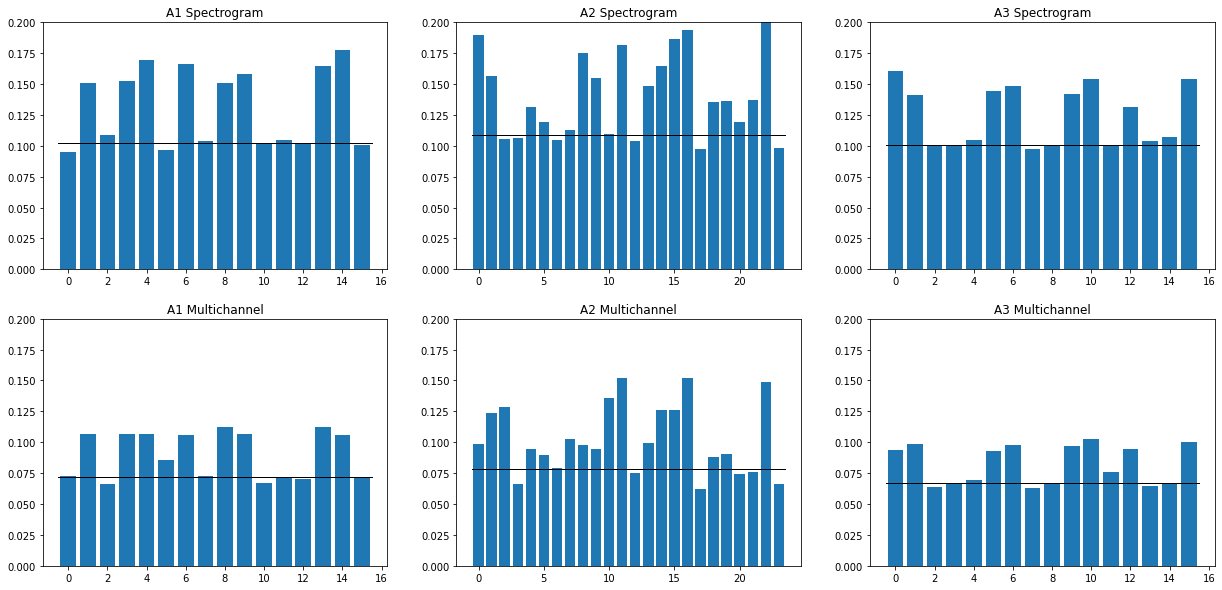

In [53]:
labels = [
    'A1 Spectrogram',
    'A2 Spectrogram',
    'A3 Spectrogram',
    'A1 Multichannel',
    'A2 Multichannel',
    'A3 Multichannel',
]

cols = 3
rows = 2
fig = plt.figure(figsize = (7 * cols, 5 * rows))
axes = [plt.subplot(rows, cols, idx + 1) for idx in range(6)]

for mse, ax, lab in zip(mses, axes, labels):
    ax.bar(np.arange(len(mse)), mse)
    ax.plot(
        [-0.5, len(mse) - 0.5], 
        [np.percentile(mse, 25), np.percentile(mse, 25)], 
        linewidth = 1, 
        c = 'black'
    )
    ax.set_ylim(0, 0.2)
    ax.set_title(lab)
plt.show()

In [55]:
best = [
    np.min(lst)
    for lst in mses
]
best

[0.09475187027781178,
 0.09767757985348648,
 0.09730340277182023,
 0.06603186629779002,
 0.06243457680745417,
 0.06257990887242335]

In [64]:
df1 = pd.DataFrame(params_1, columns = [
    'depth_pre',
    'width_pre',
    'width_mid',
    'depth_post',
    'width_post',
    'dropout'
])

df1['mses'] = mses[0]

df1.sort_values('mses')

,depth_pre,width_pre,width_mid,depth_post,width_post,dropout,mses
0,1,64,128,1,64,0.0,0.094752
5,1,128,256,1,128,0.3,0.096848
15,2,128,256,2,128,0.3,0.100563
10,2,64,128,2,64,0.0,0.101880
12,2,128,256,1,128,0.0,0.102564
7,1,128,256,2,128,0.3,0.103473
11,2,64,128,2,64,0.3,0.104851
2,1,64,128,2,64,0.0,0.108749
8,2,64,128,1,64,0.0,0.150890
1,1,64,128,1,64,0.3,0.151150


In [66]:
df2 = pd.DataFrame(params_2, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df2['mses'] = mses[1]

df2.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
17,3,64,0,64,0.3,0.097678
23,3,128,1,128,0.3,0.097921
12,2,128,0,128,0.0,0.103823
6,1,128,1,128,0.0,0.104833
2,1,64,1,64,0.0,0.105155
3,1,64,1,64,0.3,0.106262
10,2,64,1,64,0.0,0.109257
7,1,128,1,128,0.3,0.112773
5,1,128,0,128,0.3,0.119293
20,3,128,0,128,0.0,0.119431


In [67]:
df3 = pd.DataFrame(params_3, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df3['mses'] = mses[2]

df3.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
7,1,128,2,128,0.3,0.097303
3,1,64,2,64,0.3,0.099673
2,1,64,2,64,0.0,0.099814
8,2,64,1,64,0.0,0.100629
11,2,64,2,64,0.3,0.100920
13,2,128,1,128,0.3,0.103932
4,1,128,1,128,0.0,0.104806
14,2,128,2,128,0.0,0.106935
12,2,128,1,128,0.0,0.131370
1,1,64,1,64,0.3,0.141304
